<a href="https://colab.research.google.com/github/jproctor-rebecca/DS/blob/main/module2-Train/LS_DS_422_Train_Assignment_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [11]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop, SGD
from tensorflow.keras.layers import Dense


In [12]:
def load_quickdraw10():
  '''
  a function that wraps preprocessing steps 
  and returns train/test split
  '''
  # load dataset
  data = np.load('quickdraw10.npz')

  # create feature matrix
  X = data['arr_0']
  y = data['arr_1']

  # set data type
  X = X.astype('float32') / 255

  # shuffle data for probability testing
  X, y = shuffle(X, y)

  # train/test split
  X_train, X_test, y_train, y_test = train_test_split(X, y)


  return X_train, y_train, X_test, y_test

In [13]:
# call data load and preprocessing function
X_train, y_train, X_test, y_test = load_quickdraw10()

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [17]:
def create_model(optimizer, learning_rate=0.01):
  '''
  Creates a model with given optimizer and learning rate
  default learning rate = 0.01
  '''
  # instantiate model
  model = Sequential([
    Dense(10, activation='relu', input_dim=784),
    Dense(5, activation='relu'),
    Dense(10, activation='softmax')
  ])
  
  # compile model
  model.compile(optimizer=optimizer(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [18]:
def experiment_and_visualize(model, X, y, batch_size):
  '''
  define a function that fits the data to the model 
  and returns data for use in finding optimal batch size,  
  learning rate, and optimizer
  '''
  # fit model to data
  results = model.fit(X, y, 
                      epochs=25, 
                      batch_size=batch_size,
                      verbose=0)
  
  # return name of optimizer
  optimizer_name = model.optimizer.get_config()['name']
  learning_rate = K.eval(model.optimizer.lr)

  # return results to dataframe
  df = pd.DataFrame.from_records(results.history)
  df['epoch'] = [i for i in range(df.shape[0])]

  # print results as heading for visualization
  title = (f'Optimizer: {optimizer_name}, '
           f'Batch Size: {batch_size}, '
           f'Learning Rate:{learning_rate}'
           )

  # map results
  # 1 row 2 columns
  # plot figure
  fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
  fig.suptitle(title, fontsize=16)
  # configure figure
  ax[0].plot(df['epoch'], df['accuracy'])
  ax[0].legend(['accuracy'])
  ax[1].plot(df['epoch'], df['loss'])
  ax[1].legend(['loss'])
  plt.show();

  final_accuracy = results.history['accuracy'][-1]

  return batch_size, final_accuracy, learning_rate, optimizer_name

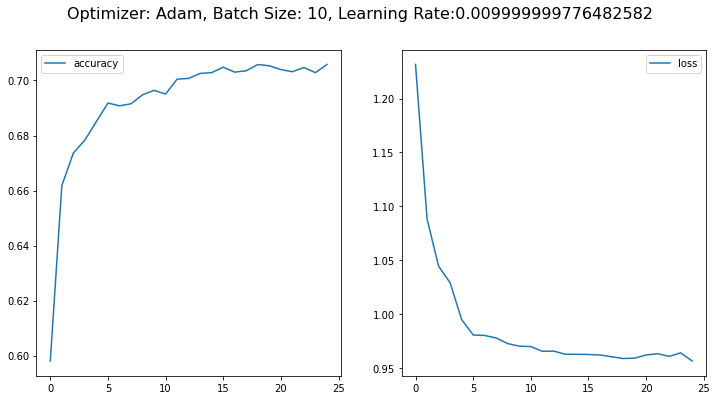

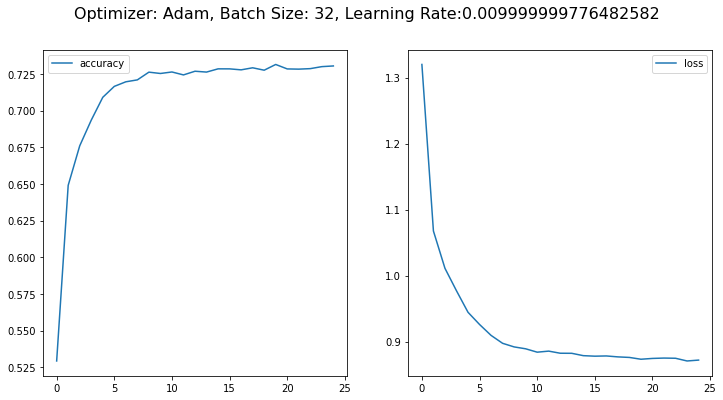

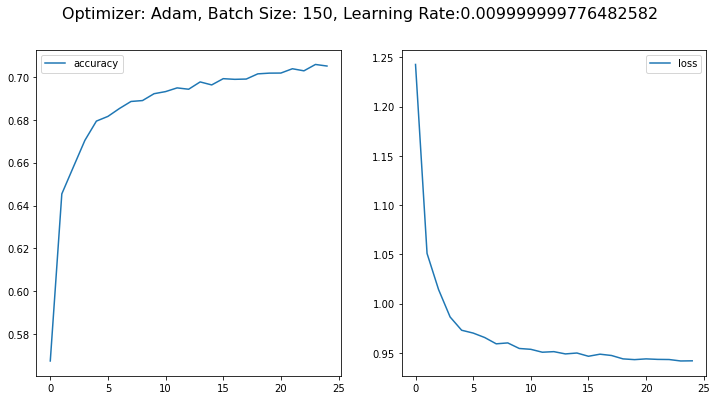

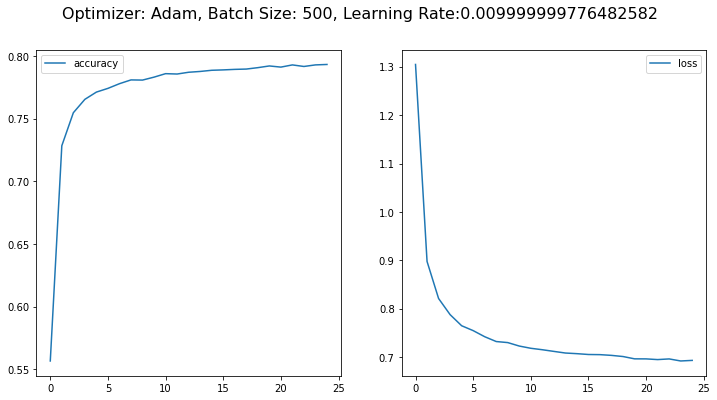

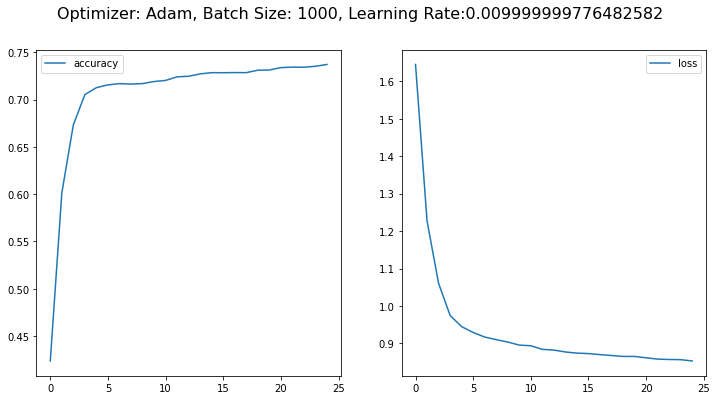

In [19]:
# Batch experiment
batch_sizes = [10, 32, 150, 500, 1000]
results = []

for bs in batch_sizes:
  results.append(experiment_and_visualize(create_model(Adam),
                                          X_train, y_train,
                                          bs))

In [24]:
# key will return max of the tuples with the highest accuracy
# (accuracy is in the [1] index of each tuple)
print(max(results, key=lambda t: t[1]))
best_batch_size = max(results, key=lambda t: t[1])[0]
# Batch size 500 is best!

(500, 0.7932133078575134, 0.01, 'Adam')


### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

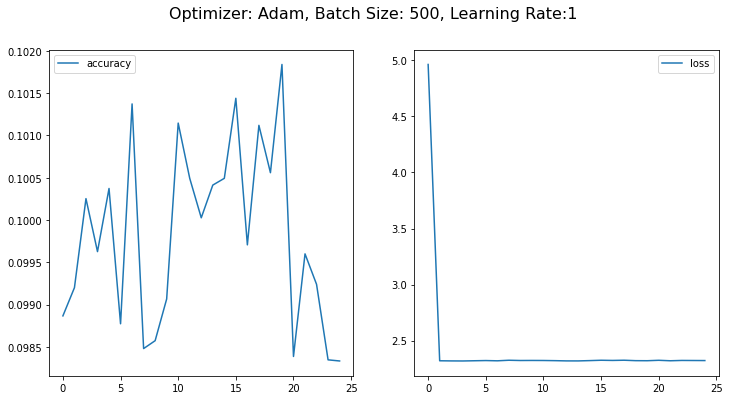

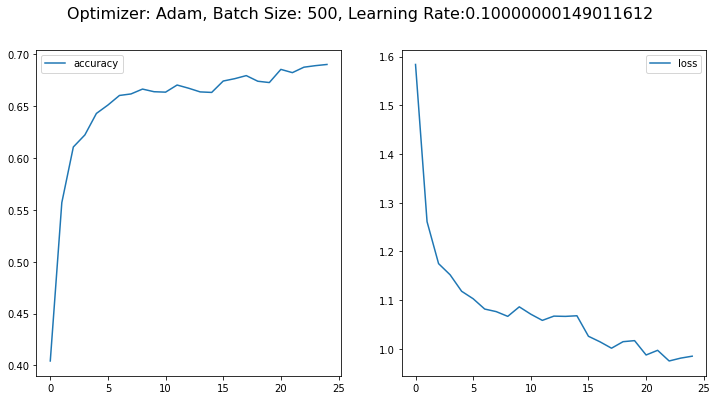

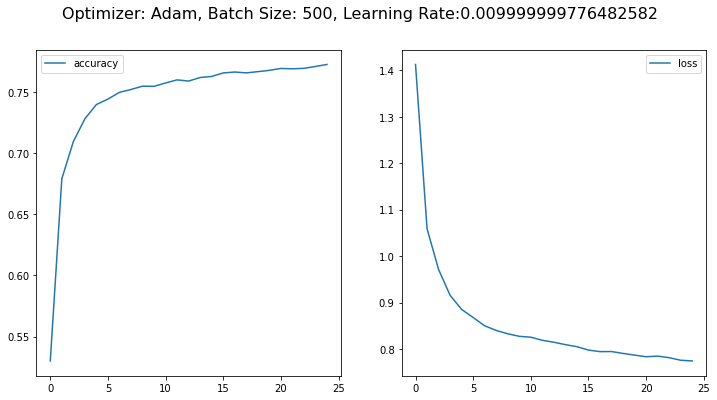

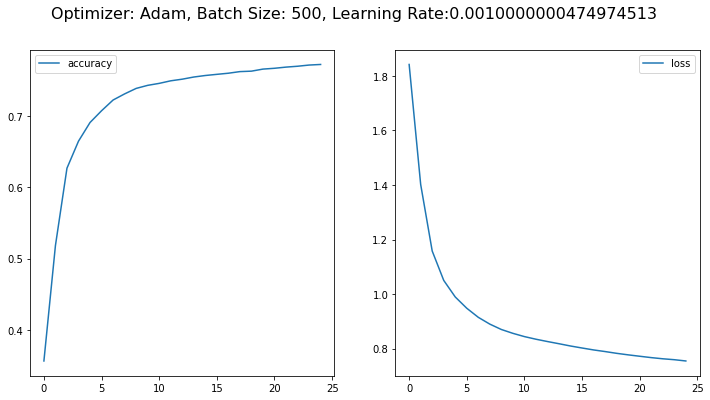

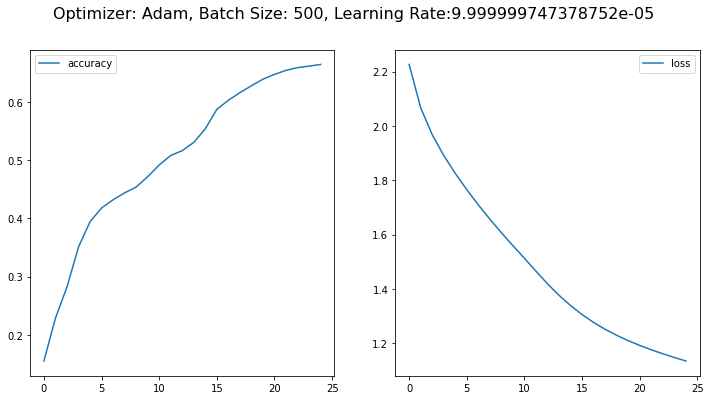

In [25]:
# Learning Rate Experiment
learning_rates = [1, .1, .01, .001, .0001]
results = []

for lr in learning_rates:
  results.append(experiment_and_visualize(create_model(Adam, learning_rate=lr),
                                          X_train, y_train,
                                          best_batch_size))

In [26]:
# key will return max of the tuples with the highest accuracy
# (accuracy is in the [1] index of each tuple)
print(max(results, key=lambda t: t[1]))
best_learning_rate = max(results, key=lambda t: t[1])[2]
# learning rate 0.01 is best!

(500, 0.7725866436958313, 0.01, 'Adam')


### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

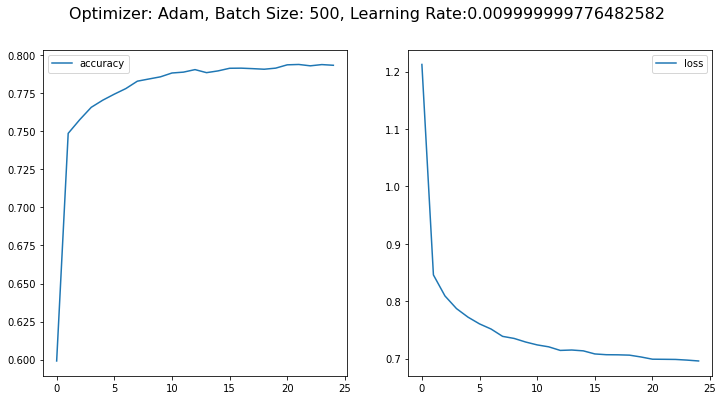

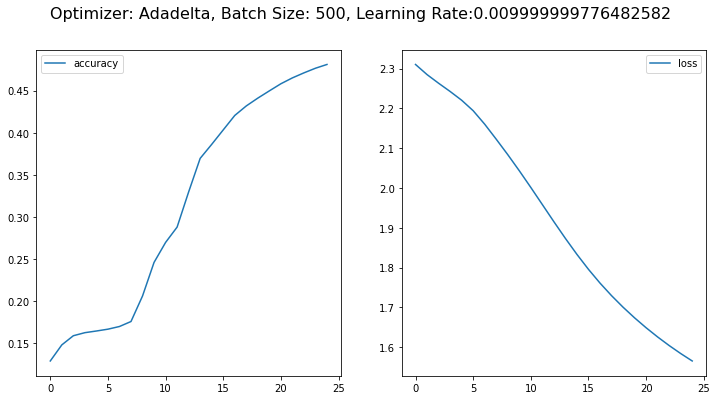

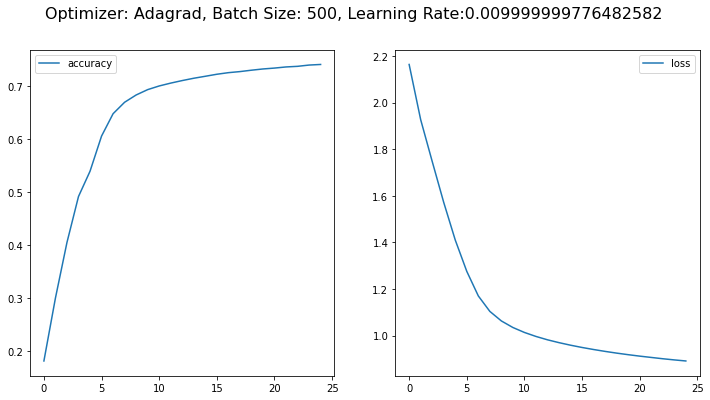

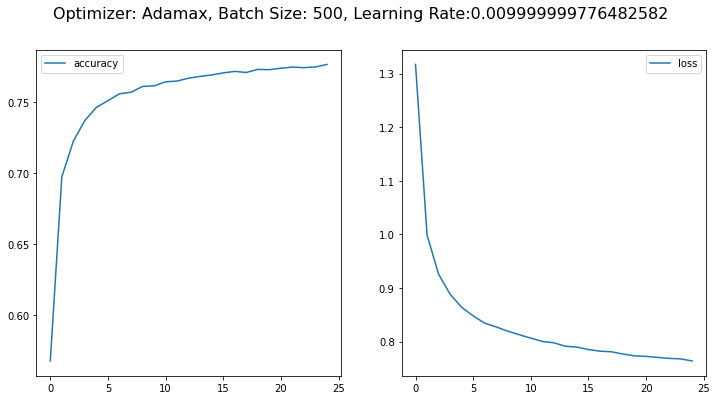

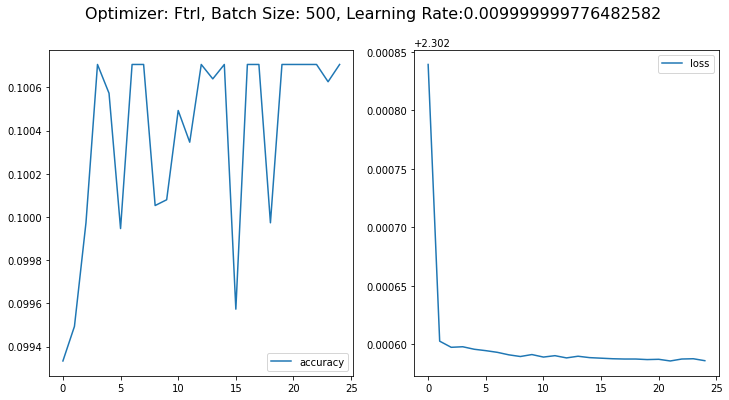

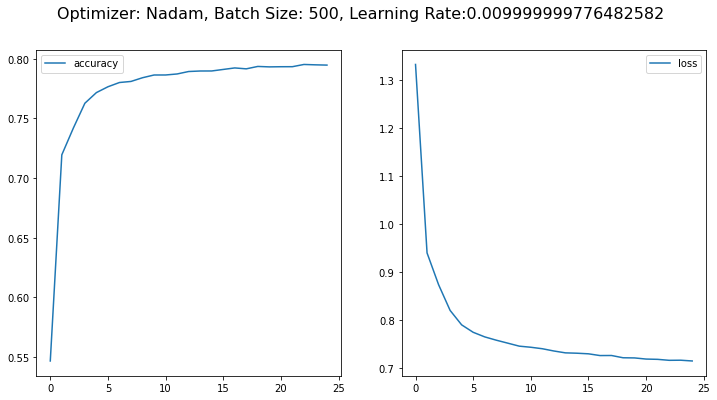

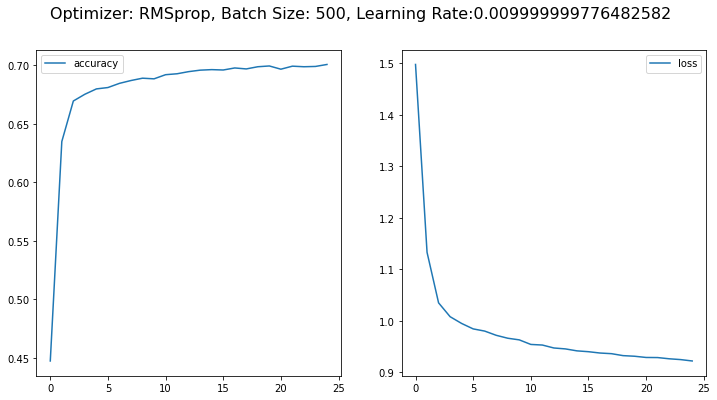

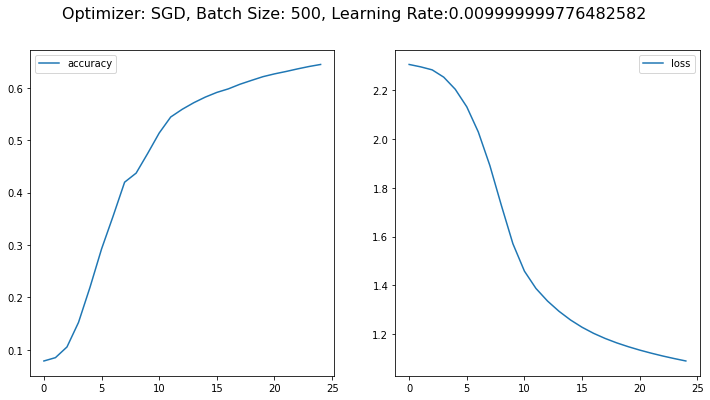

In [27]:
# Optimizer Experiment
optimizers = [Adam, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop, SGD]
results = []

for optimizer in optimizers:
  model = create_model(optimizer, learning_rate=best_learning_rate)
  result = experiment_and_visualize(model, X_train, y_train, best_batch_size)
  results.append(result)

In [28]:
# key will return max of the tuples with the highest accuracy
# (accuracy is in the [1] index of each tuple)
print(max(results, key=lambda t: t[1]))
best_learning_rate = max(results, key=lambda t: t[1])[3]
# Nadam is best!

(500, 0.7946933507919312, 0.01, 'Nadam')


### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Back-propagation is just a way of propagating the total loss
back into the neural network to know how much of the loss
every node is responsible for, and subsequently updating the
weights in such a way that minimizes the loss by giving the
nodes with higher error rates lower weights and vice versa.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


